In [1]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [2]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/kaggle.json': No such file or directory


In [3]:
! kaggle datasets download -d tawsifurrahman/covid19-radiography-database

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
License(s): copyright-authors
 98% 761M/778M [00:05<00:00, 115MB/s]
100% 778M/778M [00:05<00:00, 150MB/s]


In [4]:
from zipfile import ZipFile
file_name = "covid19-radiography-database.zip"
with ZipFile(file_name , 'r')as zip:
  zip.extractall()
  print('done')

done


Directory does not exist. Check the path.


In [5]:
!pip install split-folders
import splitfolders as sf
input_folder = "/content/dataset"
output = "/content"
#where you want the split datasets saved. one will be created if none is set

sf.ratio(input_folder, output="output", seed=42, ratio=(.8, .0,.2))
#train ,val,test

ValueError: The provided input folder "/content/dataset" does not exists.

In [ ]:
import keras,os
from keras.models import *
from keras.layers import *
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import PIL

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/output/train",target_size=(224,224))

tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/output/test", target_size=(224,224))


Found 11045 images belonging to 2 classes.
Found 2763 images belonging to 2 classes.


In [ ]:
resnet50 = tf.keras.applications.resnet50

In [ ]:
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [ ]:
conv_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for layer in conv_model.layers:
    layer.trainable = False

In [ ]:
conv_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
x = keras.layers.Flatten()(conv_model.output)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
full_model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')

history = full_model.fit_generator(
    traindata,
    steps_per_epoch=5,
    validation_data = testdata,
    workers=10,
    epochs=20,
    callbacks=[early])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
5/5 [==============================] - 54s 6s/step - loss: 3.1120 - accuracy: 0.6500 - val_loss: 4.5304 - val_accuracy: 0.7868
Epoch 2/20
5/5 [==============================] - 22s 5s/step - loss: 2.4084 - accuracy: 0.7937 - val_loss: 0.5788 - val_accuracy: 0.8769
Epoch 3/20
5/5 [==============================] - 22s 5s/step - loss: 0.6757 - accuracy: 0.8938 - val_loss: 0.5943 - val_accuracy: 0.9030
Epoch 4/20
5/5 [==============================] - 22s 5s/step - loss: 0.3892 - accuracy: 0.9187 - val_loss: 0.3522 - val_accuracy: 0.9063
Epoch 5/20
5/5 [==============================] - 22s 5s/step - loss: 0.3528 - accuracy: 0.9250 - val_loss: 0.8836 - val_accuracy: 0.8328
Epoch 6/20
5/5 [==============================] - 22s 5s/step - loss: 0.4649 - accuracy: 0.9000 - val_loss: 0.1934 - val_accuracy: 0.9519
Epoch 7/20
5/5 [==============================] - 22s 5s/step - loss: 0.2674 - accuracy: 0.9500 - val_loss: 0.2767 - val_accuracy: 0.9555
Epoch 8/20
5/5 [==================

Text(0.5, 0, 'epoch')

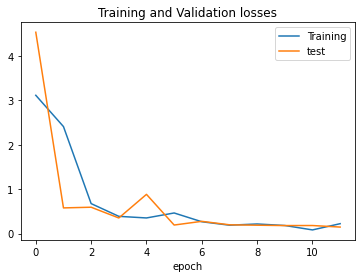

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'test'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')